In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import warnings
warnings.filterwarnings(action = 'ignore')

C:\Users\Anurag Rana\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df = pd.read_csv("D:\Data_h/Rainfall_data.csv")

In [11]:
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [12]:
df

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14
...,...,...,...,...,...,...,...
247,2020,8,1,20.08,92.31,5.34,1203.09
248,2020,9,1,19.71,90.12,9.22,361.30
249,2020,10,1,18.43,82.69,12.62,180.18
250,2020,11,1,14.83,76.06,16.95,0.49


In [13]:
df.describe()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000
mean,2010.000000,6.500000,1.0,14.416746,67.259524,16.317262,206.798929
std,6.067351,3.458922,0.0,4.382599,17.307101,6.584842,318.093091
min,2000.000000,1.000000,1.0,5.740000,34.690000,4.730000,0.000000
25%,2005.000000,3.750000,1.0,10.010000,51.845000,10.865000,0.402500
50%,2010.000000,6.500000,1.0,15.200000,66.655000,16.915000,11.495000
75%,2015.000000,9.250000,1.0,18.875000,84.610000,22.115000,353.200000
max,2020.000000,12.000000,1.0,20.570000,92.310000,29.340000,1307.430000


In [14]:
## setting date as index
df['DATE'] = pd.to_datetime(df[['Year', 'Month','Day']])
df = df.drop(columns=['Year', 'Month','Day'])
df.index = df["DATE"]
df.drop(columns=["DATE"],inplace = True)

In [6]:
df

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14
...,...,...,...,...
2020-08-01,20.08,92.31,5.34,1203.09
2020-09-01,19.71,90.12,9.22,361.30
2020-10-01,18.43,82.69,12.62,180.18


<AxesSubplot:xlabel='DATE'>

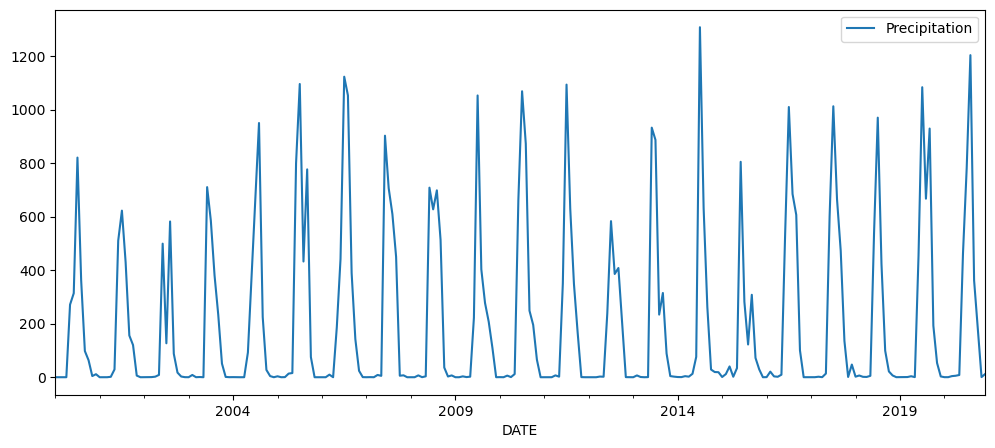

In [15]:
rain = pd.DataFrame(df["Precipitation"])
rain.index.freq = 'MS'
rain.plot()

Seasonal Decomposition: A time series data is composed of
    Trend: Trend is the overall direction of the data.
    Seasonlity: Seasonality is a periodic component which repeats itself within a particulat time period.
    Residuals: the residual is what’s left over when the trend and seasonality have been removed.Residuals are random fluctuations.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

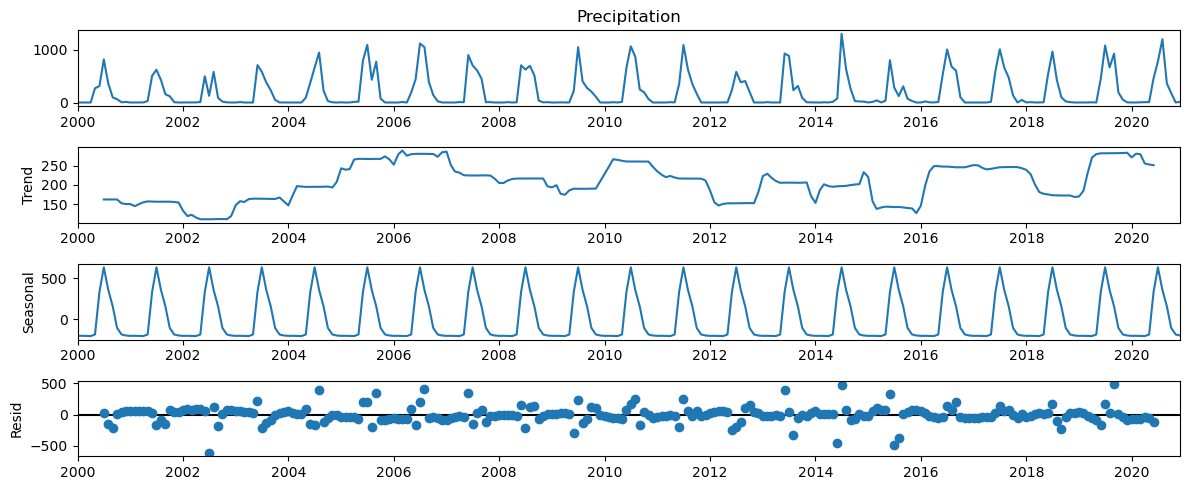

In [9]:
add = seasonal_decompose(rain["Precipitation"],model='add',period = 12)
add.plot();

The plot it clearly visible that there is seasonality in the data and some trend.

Train and Test Split
Train test split in timeseries is different as copared to Machine learning Algforithms. We do random split there where the time component does'nt matters. But in time series we have information dependent on time therefore the spliting is continous without any shuffling of data.

Using 20 years data for training (2000-01-01 to 2019-12-01)
Using 1 year data for Testing (2020-01-01 to 2020-12-01)

In [10]:
df

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14
...,...,...,...,...
2020-08-01,20.08,92.31,5.34,1203.09
2020-09-01,19.71,90.12,9.22,361.30
2020-10-01,18.43,82.69,12.62,180.18


In [11]:
len(df)-12 ## 12 is our testing period

240

In [19]:
#### training
train_data = df.iloc[:len(df)-12,:]
#### testing
test_data = df.iloc[len(df)-12:,:]

In [20]:
test_data

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2020-01-01,10.62,67.56,22.98,0.17
2020-02-01,9.28,49.88,24.97,0.19
2020-03-01,10.50,49.38,24.87,4.09
2020-04-01,13.31,51.19,22.09,5.46
2020-05-01,16.17,57.25,16.63,8.29
2020-06-01,19.78,83.00,11.76,462.71
2020-07-01,20.26,90.19,7.08,781.13
2020-08-01,20.08,92.31,5.34,1203.09
2020-09-01,19.71,90.12,9.22,361.30


Exponential Smoothing
Exponential smoothing is generally used to make short-term forecasts
More recent observations are given larger weights by exponential smoothing
Exponential Smoothing Methods
Simple or Single Exponential Smoothing
Double Exponential Smoothing
Triple Exponential Smoothing
Single Exponential Smoothing

If the data has no trend and no seasonal pattern, then this method of forecasting the time series is essentially used.
This method uses weighted moving averages with exponentially decreasing weights.
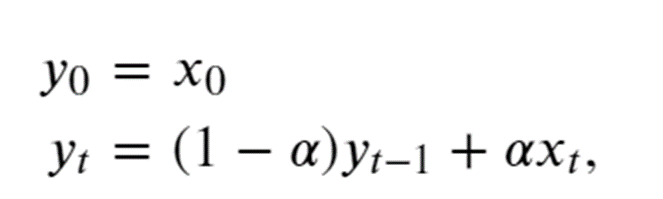

Double Exponential Smoothing

This method is also called as Holt’s trend corrected or second-order exponential smoothing.
This method is used for forecasting the time series when the data has a linear trend and no seasonal pattern.
It introduces a new smoothing factor beta that addresses trend in data
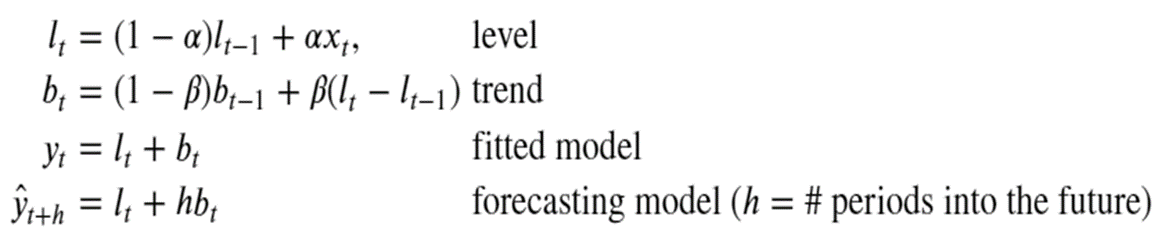
Triple Exponential Smoothing

In this method, exponential smoothing applied three times.
This method is used for forecasting the time series when the data has both linear trend and seasonal pattern.
This method is also called Holt-Winters exponential smoothing.
It introduces a new smoothing factor γ that addresses seasonality in data
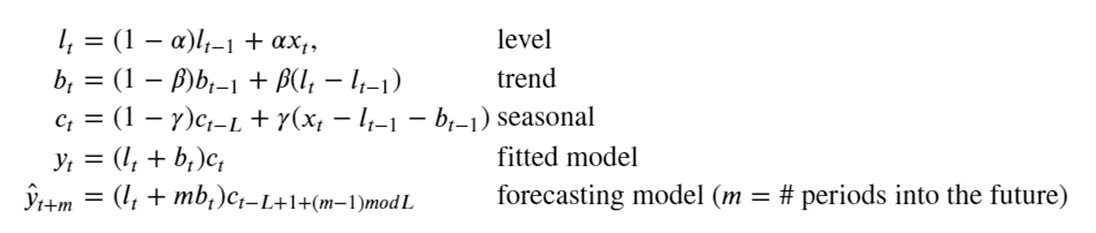

As we have seen in sesonal decompose the data has trend as well as seasonality we are going to use Triple exponential smoothing for making prediction

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [22]:
## For triple exponential smoothing we pass the trend,seasonality and seasonal period parameter 
fitted_model = ExponentialSmoothing(train_data['Precipitation'],trend='add',seasonal = "add",seasonal_periods=12).fit()

In [23]:
## Making predictions
test_predictions = fitted_model.forecast(12).rename('HW Forecast')
test_predictions

2020-01-01     49.224762
2020-02-01     54.207357
2020-03-01     55.991099
2020-04-01     54.636734
2020-05-01     71.555347
2020-06-01    586.239022
2020-07-01    953.963582
2020-08-01    595.715297
2020-09-01    469.562452
2020-10-01    156.236489
2020-11-01     69.848234
2020-12-01     66.909118
Freq: MS, Name: HW Forecast, dtype: float64

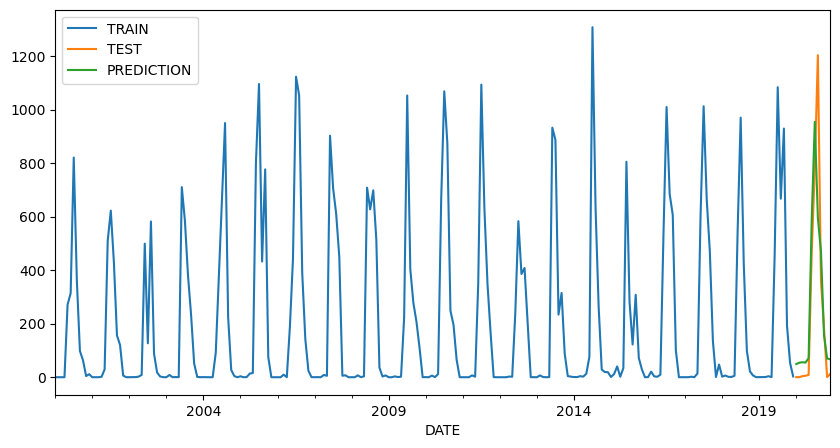

In [24]:
## plotting
train_data['Precipitation'].plot(legend=True,label='TRAIN')
test_data['Precipitation'].plot(legend=True,label='TEST',figsize=(10,5));
test_predictions.plot(legend=True,label='PREDICTION');

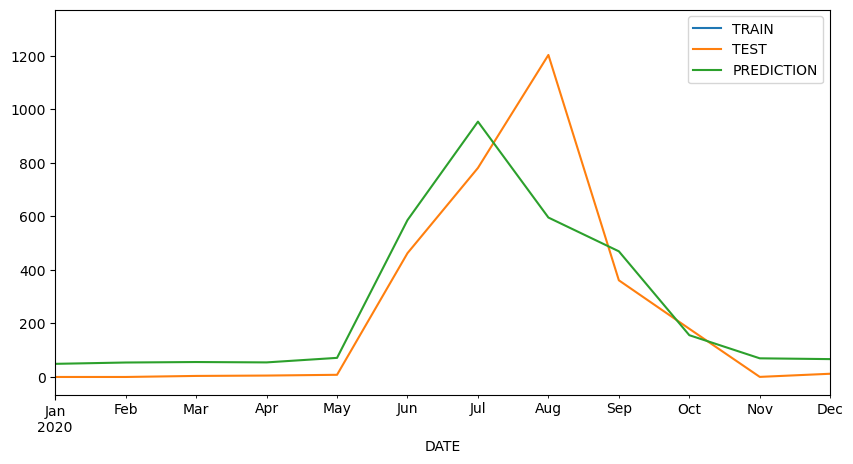

In [25]:
## ploting actual and predicted values
train_data['Precipitation'].plot(legend=True,label='TRAIN')
test_data['Precipitation'].plot(legend=True,label='TEST',figsize=(10,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-01-01','2020-12-01']);

In [26]:
## Evaluation Metrics
def metrics(test_data,test_predictions):
    print("MAE: ",mean_absolute_error(test_data,test_predictions))
    print("MSE: ",mean_squared_error(test_data,test_predictions))
    print("RMSE: ",np.sqrt(mean_squared_error(test_data,test_predictions)))

In [27]:
metrics(test_data["Precipitation"],test_predictions)

MAE:  118.94966003793314
MSE:  37380.67844721093
RMSE:  193.3408349190903


Model evaluation
After we have trained and tested our data if we are satisfied with the model performance on testing data we can train the model on complete data and forecast for future period

In [28]:
## Giving all data as input for training
train_data = df

In [29]:
fitted_model = ExponentialSmoothing(train_data['Precipitation'],
                                    trend='add',
                                    seasonal = "add",
                                    seasonal_periods=12).fit()
Forecast_exponential = fitted_model.forecast(12).rename('HW Forecast')

In [30]:
Forecast_exponential

2021-01-01     43.608607
2021-02-01     47.836142
2021-03-01     49.819191
2021-04-01     48.773385
2021-05-01     63.542453
2021-06-01    570.005214
2021-07-01    929.876223
2021-08-01    679.715815
2021-09-01    451.797373
2021-10-01    158.646832
2021-11-01     59.285807
2021-12-01     57.189614
Freq: MS, Name: HW Forecast, dtype: float64

<AxesSubplot:xlabel='DATE'>

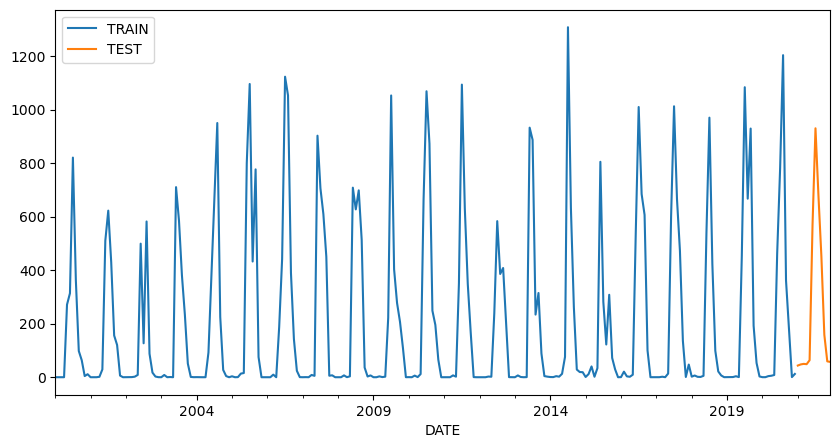

In [31]:
## Actual data and foreecast
train_data['Precipitation'].plot(legend=True,label='TRAIN')
Forecast_exponential.plot(legend=True,label='TEST',figsize=(10,5))

AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA)
ARIMA Models are of two types
Non Seasonal ARIMA(considers only trend in data) also called ARMA
Seasonal ARIMA(considers trend as well as seasonality)
ARMA models are applied when data is stationary
ARIMA models are applied in cases where data shows evidence of Non-Stationarity
Non-stationary Data is data whose mean, variance, and covariance changes over time
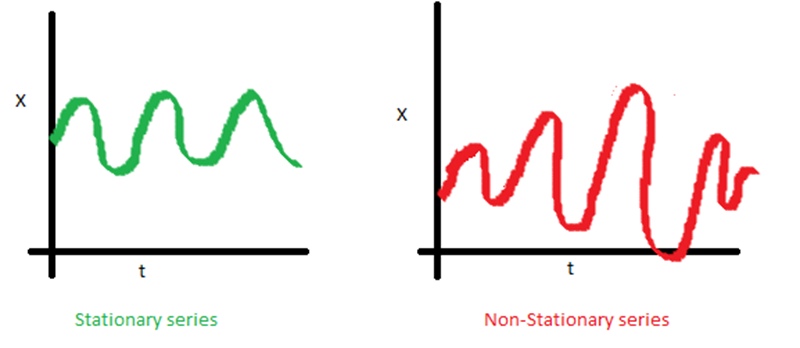

Non - Seasonal ARIMA are denoted by ARIMA(p,d,q)

AR(p) Autoregression: a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.(lags)
I(d) Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
MA(q) Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Seasonal ARIMA add another parameter called the seasonal-order

Checking for stationarity in data
We use augemented Dickey Fullers test for checking stationarity
Stationarity testing hypothesis
Null Hypothesis:
Data has unit roots which means data is non stationary
Alternate hypothesis
Data does not has unit roots
If data is stationary with only trend we will apply ARMA model
If data is non-stationary with only trend we will apply ARIMA model
If data is non-stationary with trend and seasonality we will apply Seasonal ARIMA model

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [33]:
adf_test(rain,title='rain')

Augmented Dickey-Fuller Test: rain
ADF test statistic       -2.466325
p-value                   0.123884
# lags used              12.000000
# observations          239.000000
critical value (1%)      -3.458011
critical value (5%)      -2.873710
critical value (10%)     -2.573256
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


ACF(Auto correlation Function) and PACF(Partial auto correlation Function) plot
ACF: ACF summarizes the correlation of an observation with lag values
PACF: PACF summarizes the correlation of an observation with lag values that are not accounted in prior lagged observations
Both Plots are drawn as barcharts showing 95% confidence interval with. Bars that cross confidence interval are more significant

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

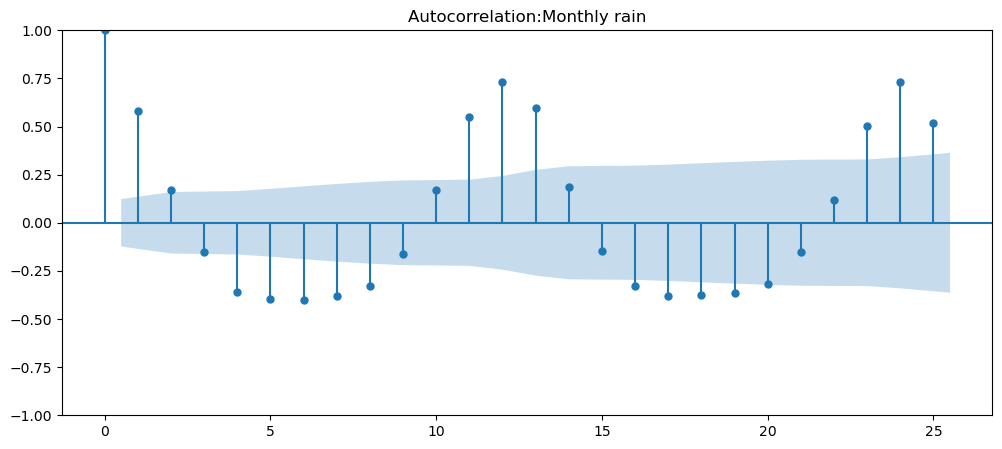

In [35]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation:Monthly rain'
plot_acf(rain,title=title);

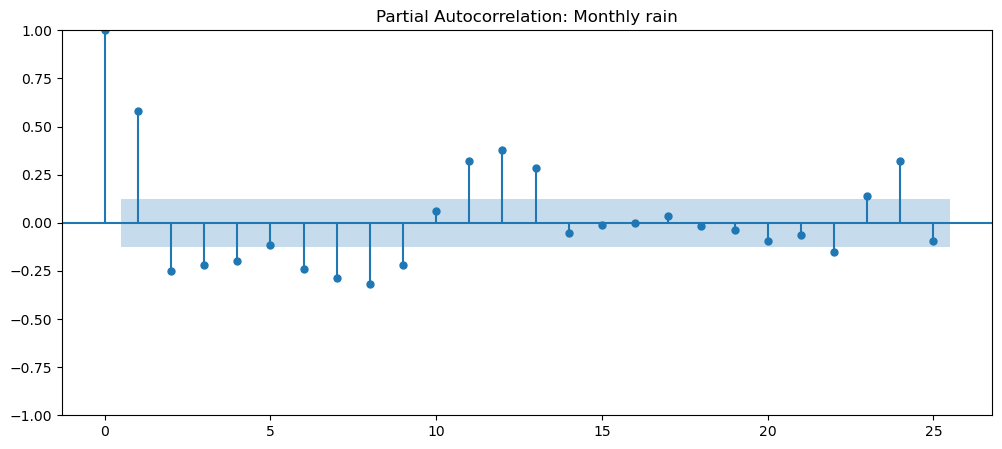

In [36]:
title='Partial Autocorrelation: Monthly rain'
plot_pacf(rain,title=title);

Auto Arima
Autoarima helps us to decide the parameters p,q,d and seasonal order

In [30]:
!pip install pmdarima

     -------------------------------------- 615.0/615.0 kB 6.4 MB/s eta 0:00:00


Using seasonal ARIMA as we know data has seasonality and trend and data is non stationary

In [37]:
from pmdarima import auto_arima  
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# For SARIMA Orders we set seasonal=True and pass in an m value where m is set as 12 because data has yearly seasonality

auto_arima(rain['Precipitation'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  252
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1642.260
Date:                              Thu, 29 Feb 2024   AIC                           3296.521
Time:                                      14:51:15   BIC                           3317.697
Sample:                                  01-01-2000   HQIC                          3305.042
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9344      2.808      0.689      0.491      -3.570       7.439
ar.L1          0.1215      0.045      2.683      0.007       0.033       0.210
ar.S.L12       0.7409      0.052     14.249      0.000       0.639       0.843
ar.S.L24       0.2475      0.050      4.980      0.000       0.150       0.345
ma.S.L12      -0.7332      0.054    -13.488      0.000      -0.840      -0.627
sigma2      2.358e+04   1112.759     21.195      0.000    2.14e+04    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               347.42
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             1.07
Prob(H) (two-sided):                  0.67   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The predicted values are SARIMAX(1, 0, 0)x(2, 0, [1], 12)

In [40]:
#### training
train_data = df.iloc[:len(df)-12,:]
#### testing
test_data = df.iloc[len(df)-12:,:]

In [41]:
model = SARIMAX(train_data['Precipitation'],order=(1,0,0),seasonal_order=(2,0,[1],12))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65950D+00    |proj g|=  4.20110D+00
 This problem is unconstrained.
At iterate    5    f=  6.72687D+00    |proj g|=  2.53953D-02

At iterate   10    f=  6.72023D+00    |proj g|=  3.19731D-03

At iterate   15    f=  6.70780D+00    |proj g|=  6.21238D-02

At iterate   20    f=  6.57837D+00    |proj g|=  7.16054D-02

At iterate   25    f=  6.52580D+00    |proj g|=  5.71126D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     47      1     0     0   5.711D-02   6.526D+00
  F =   6.5257958623873025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH  

In [42]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,0)(2,0,[1],12) Predictions')

In [43]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['Precipitation'][i]}")

predicted=0.190809257, expected=0.17
predicted=3.150541378, expected=0.19
predicted=4.409891838, expected=4.09
predicted=2.197069726, expected=5.46
predicted=36.60715946, expected=8.29
predicted=539.5051765, expected=462.71
predicted=803.8564039, expected=781.13
predicted=542.9008392, expected=1203.09
predicted=294.5562142, expected=361.3
predicted=86.32083996, expected=180.18
predicted=12.87432807, expected=0.49
predicted=4.804713914, expected=12.23


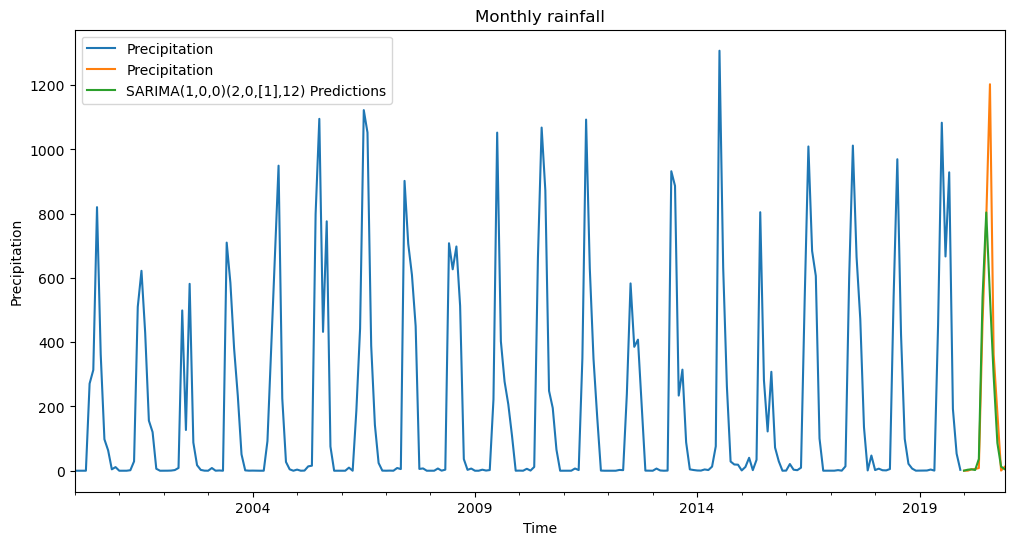

In [45]:
# Plot predictions against known values
title = 'Monthly rainfall'
ylabel='Precipitation'
xlabel='Time'

ax =train_data["Precipitation"].plot(legend = True)
test_data['Precipitation'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

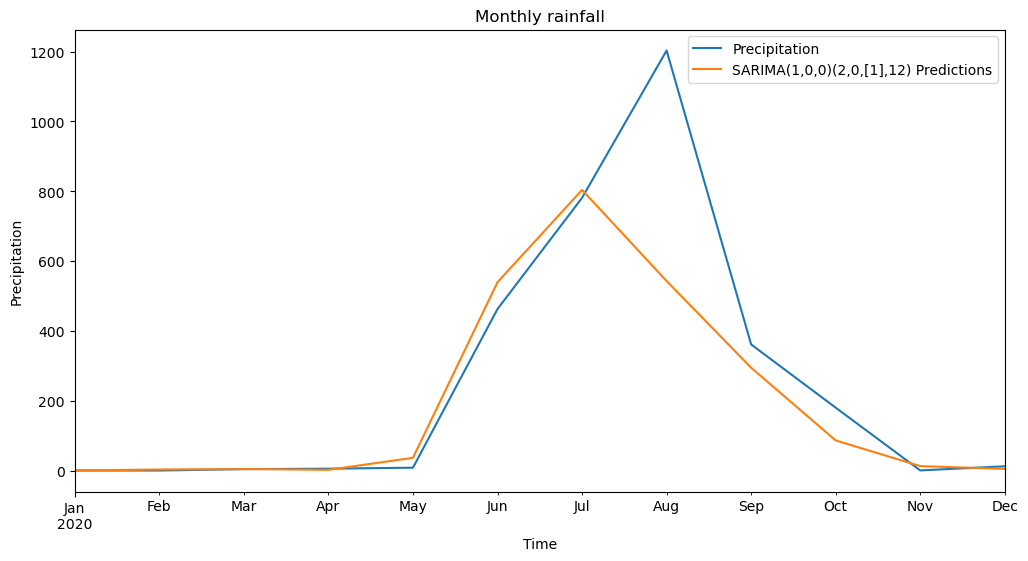

In [46]:
# Plot predictions against known values
title = 'Monthly rainfall'
ylabel='Precipitation'
xlabel='Time'

ax = test_data['Precipitation'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [47]:
## evaluation
metrics(test_data["Precipitation"],predictions)

MAE:  81.25038611844789
MSE:  38046.48948159534
RMSE:  195.05509345206892


Training model on complete dataset if we are satisfied by the evaluation metrics of model

In [48]:
#### training
train_data = df

In [49]:
model = SARIMAX(train_data['Precipitation'],order=(1,0,0),seasonal_order=(2,0,[1],12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(1,0,0)(2,0,[1],12) Forecast')

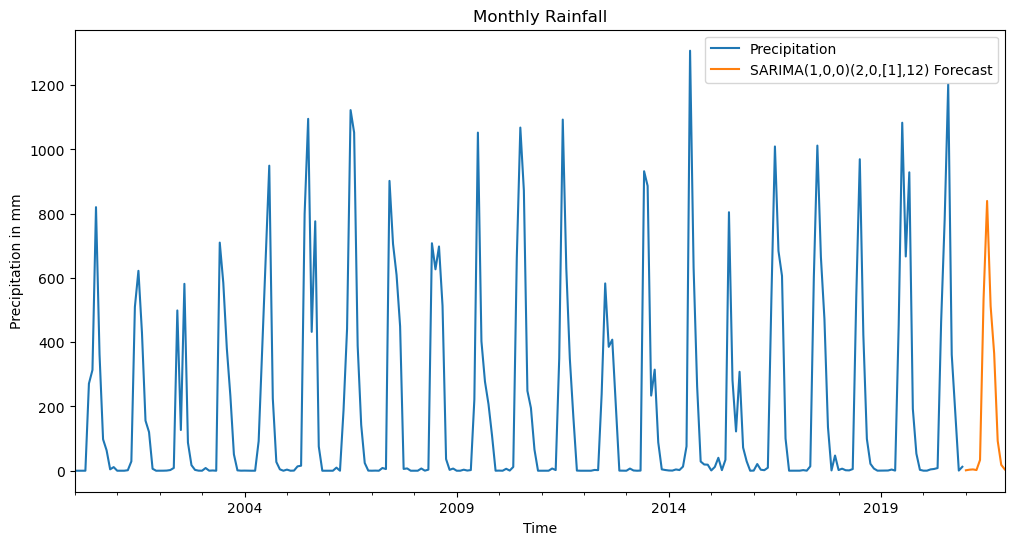

In [50]:
# Plot predictions against known values
title = 'Monthly Rainfall'
ylabel='Precipitation in mm'
xlabel='Time'

ax = train_data['Precipitation'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [51]:
print("Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)
print('\n')
print("Sarima model: ")
metrics(test_data["Precipitation"],predictions)

Exponential Smoothing model: 
MAE:  118.94966003793314
MSE:  37380.67844721093
RMSE:  193.3408349190903


Sarima model: 
MAE:  81.25038611844789
MSE:  38046.48948159534
RMSE:  195.05509345206892
